## Objective

The primary objective of the machine learning model is classification. We want to determine which connections a firewall should allow, deny, drop, or "reset-both." Automating the classification of firewall rules is beneficial because many features of network traffic, such as bytes sent, are continuous rather than discrete, making set threshold values difficult to set. In addition, malicious or unwanted traffic likely cannot be identified by just one factor. For example, traffic over a certain port may normally be benign, but high volume could indicate malicious activity. Finally, machine learning can help identify trends and patterns that are too difficult for humans to identify manually, but emerge given enough training data.



## Dataset
The data set contains the following features: Source Port, Destination Port, NAT Source Port, NAT Destination Port, Bytes, Bytes Sent, Bytes Received, Packets, Elapsed Time (sec), pkts_sent, pkts_received, and Class. Only on of the features, Class, is categorical. These are the target values we will use to train the model for classification.

To begin train a model for classification, we have to convert the string classes into numbers that sklearn can process. To do this we use sklearn's LabelEncoder to preprocess the classes. We pass the column of the class to the method fit_transform. This creates an object containing our target values converted to integers and ready for training. We can still view the associated strings with by printing "le.classes_".

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
df = pd.read_csv("Firewall_Rule_Classification.csv")
le = LabelEncoder()
# Encode the classes
y = le.fit_transform(df["Class"])
class_names = le.classes_
print('Class labels:', class_names)
# Class labels: ['allow' 'deny' 'drop' 'reset-both']

## Preprocessing

## Models Explored

I used Decision Trees, Random Forest, and Naive Bayes to classify the data. I decided to add Naive Bayes as I intend to use it in my final project and wanted to be familiary with how it functioned.

### Decisions Trees

#### Hyperparameters
My previous work during week five found that using the Gini impurity measure performed better than Entropy. In addition, I attained significantly better accuracy until a depth of five, when accuracy gains started to level off.

#### Results

METRICS FOR DEPTH 5 AND CRITERION Gini

Overall Accuracy: 0.9984

Classification Report:

| | precision | recall | f1-score | support |
|:---|:---:|:---:|:---:|---:|
| **allow** | 1.00 | 1.00 | 1.00 | 30063 |
| **deny** | 1.00 | 1.00 | 1.00 | 12011 |
| **drop** | 1.00 | 1.00 | 1.00 | 10308 |
| **reset-both** | 1.00 | 0.23 | 0.37 | 44 |
| | | | | |
| **accuracy** | | | 1.00 | 52426 |
| **macro avg** | 1.00 | 0.81 | 0.84 | 52426 |
| **weighted avg** | 1.00 | 1.00 | 1.00 | 52426 |

Confusion Matrix:

Training Accuracy: 0.9984

Test Accuracy:     0.9984

The actual depth of the tree is: 5

(The maximum allowed depth was: 5)

#### Analysis

The decision tree performed very well on the data, achieving 0.9984 percent accuracy on the training data and testing data. However, this could be a sign of overfitting, as the resulting decision tree is extremely well-fit for the data provided by might struggle to generalize as show in the visualization:

![image.png](results/decision_tree_5_gini.png)



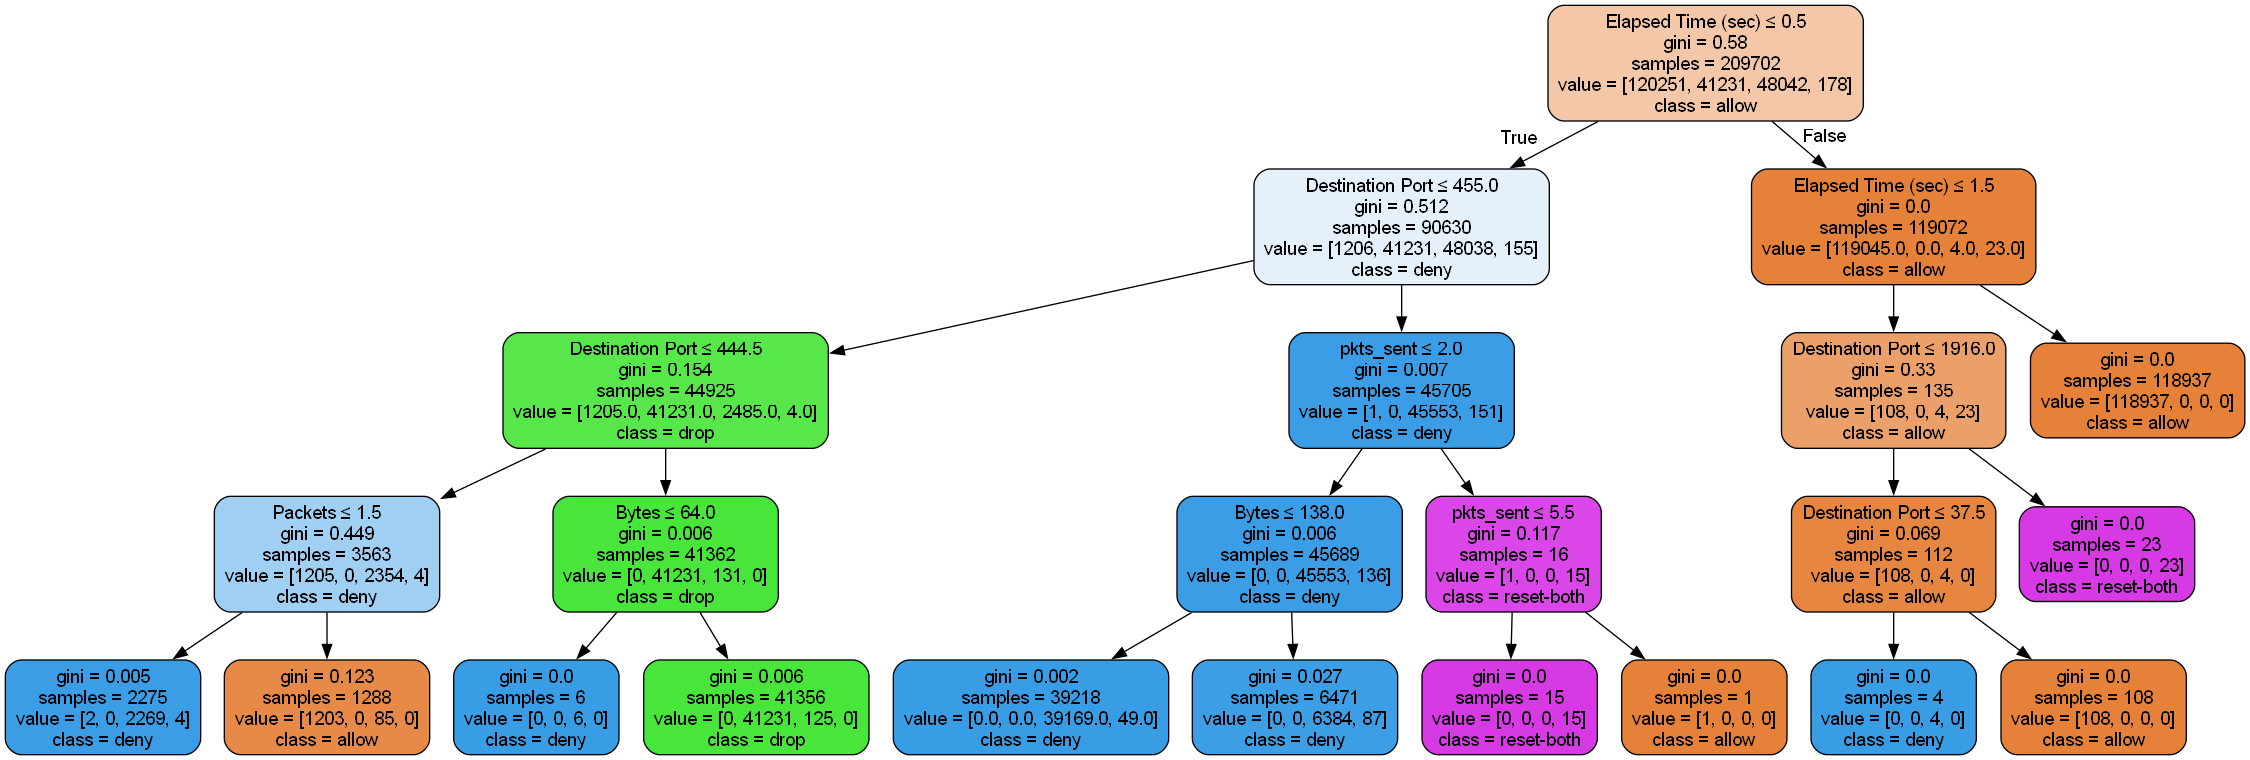
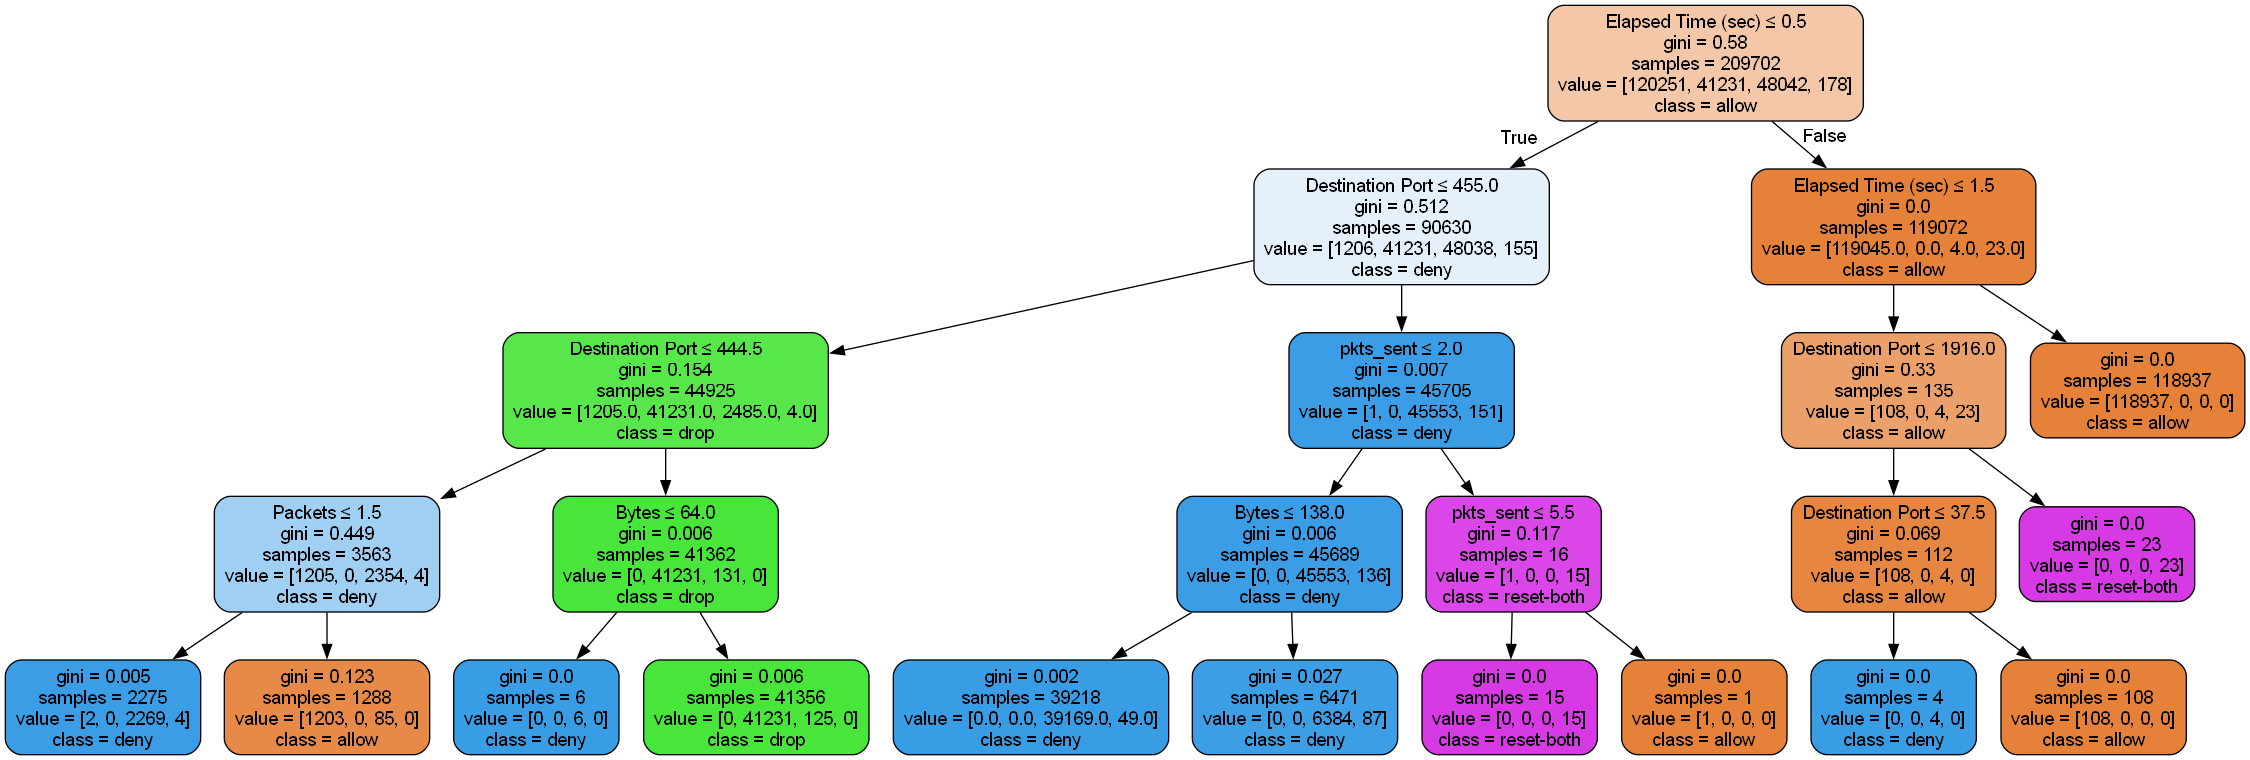

This visualization allows us to directly examine the logic of the decision tree, including where leaves could be pruned. For example, very little information gain occurred between the fourth and fifth levels. The decision tree model also struggled at classifying data into "reset-both". This can primarily be attributed to this class be extremely unrepresented in the training data.

![image.png](results/DecisionTreeConfusionMatrix.png)
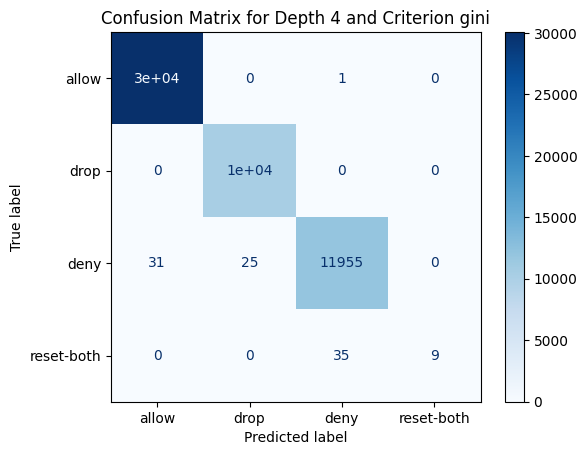

The decision tree utilized three features, elapsed time, destination port, and packets to classify the data. Elapsed time and destination port made up the overwhelming majority of classification decision nodes.

![image.png](results/DecisionTreeFeatures.png)
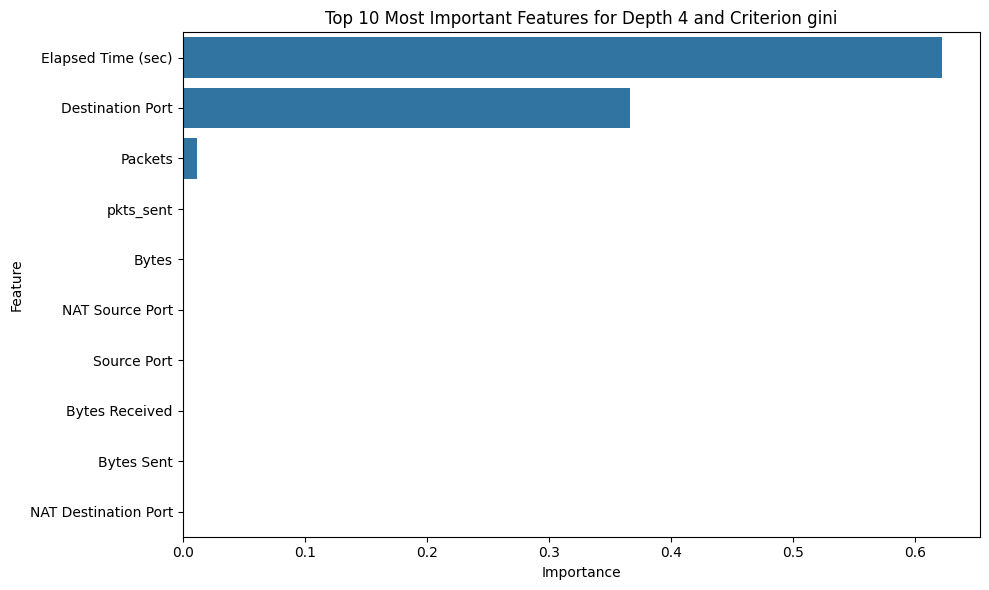

### Random Forest
#### Hyperparameters
I decided to set n_estimators, meaning the number of decision trees in the forest, to 100, which is the default

#### Results

METRICS FOR RANDOM FOREST MODEL

(Estimators: 100, LR: 1.0)

Overall Accuracy: 0.9996

Classification Report:

| | precision | recall | f1-score | support |
|:---|:---:|:---:|:---:|---:|
| **allow** | 1.00 | 1.00 | 1.00 | 30063 |
| **deny** | 1.00 | 1.00 | 1.00 | 12011 |
| **drop** | 1.00 | 1.00 | 1.00 | 10308 |
| **reset-both** | 1.00 | 0.98 | 0.99 | 44 |
| | | | | |
| **accuracy** | | | 1.00 | 52426 |
| **macro avg** | 1.00 | 0.99 | 1.00 | 52426 |
| **weighted avg** | 1.00 | 1.00 | 1.00 | 52426 |

Confusion Matrix:

Training Accuracy: 0.9998

Test Accuracy:     0.9996

#### Analysis
The random forest model achieved the highest accuracy of all tested models, with 0.9998 on training data and 0.9996 on testing data. These results do suggest a degree of overfitting. However, this model was also the only model that successfully classified the majority of "result-both" classes, despite be very under-represented in the training data:

![image.png](results/RandomForestConfusionMatrix.png)
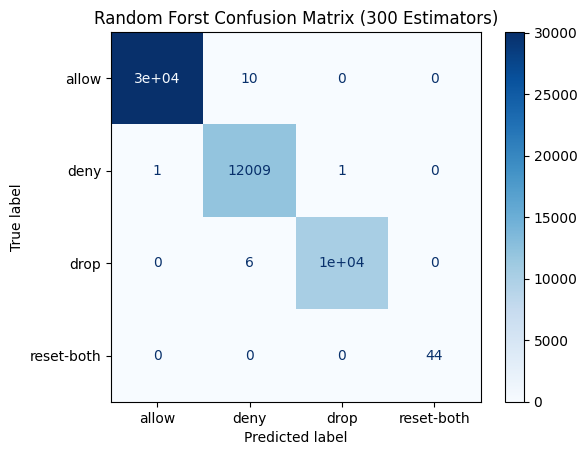

A noticeable difference between the decision tree model and the random forest is the latter's use of all features to classify the data, rather than just three features. This can be attributed to random forest's use of many decision trees, each given random features to classify. As such all features were taken into account. The advantage of this is that the model is less likely to overfit and more likely to take into account other features in future data.

Still, several features stood out as more important, including destination port, elapsed time, and NAT ports:

![image.png](results/RandomForestFeatures.png)
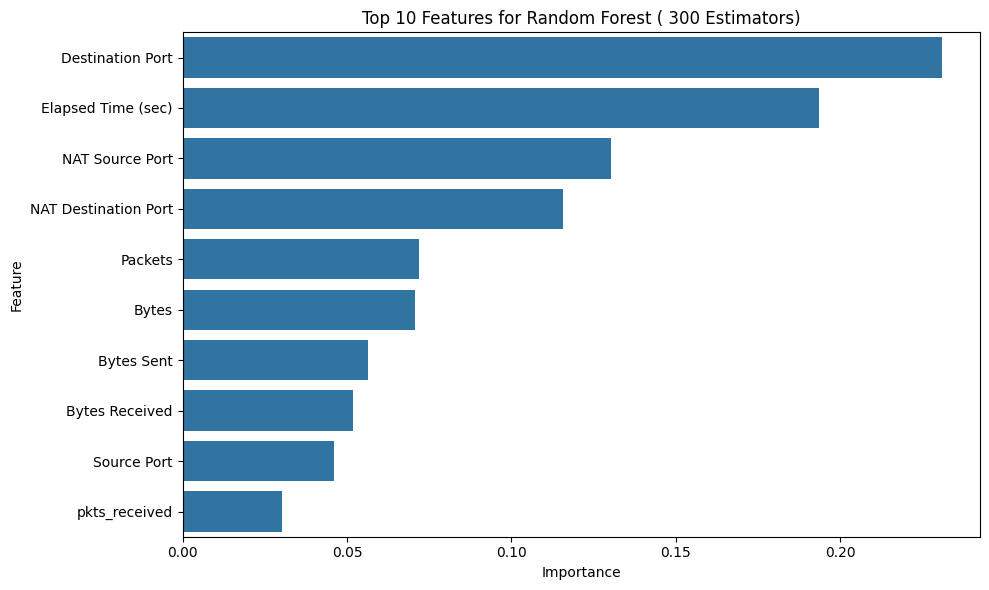

### Complement Naive Bayes
#### Hyperparameters
I decided to use a variation of Naive Bayes, Complement Naive Bayes, because sklearn suggested it performed better on highly imbalanced dataset. I used the default setting for hyperparameters.

#### Results

METRICS FOR COMPLEMENT NAIVE BAYES

Overall Accuracy: 0.9128

Classification Report:

| | precision | recall | f1-score | support |
|:---|:---:|:---:|:---:|---:|
| **allow** | 1.00 | 0.88 | 0.93 | 30063 |
| **deny** | 0.98 | 0.93 | 0.96 | 12011 |
| **drop** | 0.71 | 1.00 | 0.83 | 10308 |
| **reset-both** | 0.00 | 0.00 | 0.00 | 44 |
| | | | | |
| **accuracy** | | | 0.91 | 52426 |
| **macro avg** | 0.67 | 0.70 | 0.68 | 52426 |
| **weighted avg** | 0.94 | 0.91 | 0.92 | 52426 |

Confusion Matrix:

Training Accuracy: 0.9138

Test Accuracy:     0.9128



Accuracy: 0.9128295120741616

F1 Score: 0.908917365026234

#### Analysis

Naive bayes performed the worst of the three models, with a 0.912 accuracy on the training data and 0.909 on the test data. More concerningly, the model failed to classify any data into "reset-both" due to its under-representation in the data. Naive Bayes is generally considered bad at classifying imbalanced dataset. Complement's Naive Bayes is an alternative version of the model which is supposedly better at classifying imbalanced datasets. The model takes into account the probability of other classes. However, my results suggest this has its limits. These results have made me reconsider using Naive Bayes in my final project.


## Conclusion and Further Exploration

I found the most effective model for firewall classification was Random Forest. The model has the highest accuracy while also successfully classifying under-represented classes from the imbalanced dataset. While the decision tree model also had a high accuracy, I would be concerned about using this model due to its tendency to overfit and its reliance on only three features for classification.

Naive Bayes, while fast and not computationally intense, failed at classifying "reset-both" due to its rarity. This highlighted the model's shortcoming for me, including how those shortcomings may impact its usefulness in my final project.

For future exploration, I would like to experiment with the number of estimators (decision trees) is optimal for a random forest model used for firewall rule classification. In a production environment, the model would likely have to act very fast at analyzing the large volume of connections that a firewall records. A smaller number of estimators may perform just as well without requiring significant computation time. I could also experiment with learning rates and using the entropy impurity metric to determine the highest performing model for this use case.